In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf,adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras
import tensorflow
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import LSTM,Bidirectional

In [2]:
# from google.colab import files
# uploaded=files.upload()

In [3]:
data=pd.read_csv("VBL.NS.csv")

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-15,326.666656,331.483337,309.033325,310.916656,308.481873,1696692
1,2021-11-16,312.883331,313.216675,305.333344,307.316681,304.910095,1338645
2,2021-11-17,308.233337,314.000000,306.833344,310.250000,307.820465,1042938
3,2021-11-18,310.250000,318.333344,305.700012,316.549988,314.071106,1435833
4,2021-11-22,318.433319,319.633331,299.383331,304.216675,301.834351,1254519
...,...,...,...,...,...,...,...
491,2023-11-07,949.900024,998.500000,947.400024,991.200012,991.200012,4915974
492,2023-11-08,1008.500000,1024.000000,997.099976,1008.849976,1008.849976,2631091
493,2023-11-09,1015.000000,1015.000000,996.700012,1002.549988,1002.549988,1256722
494,2023-11-10,1003.799988,1014.250000,993.700012,1009.049988,1009.049988,1218861


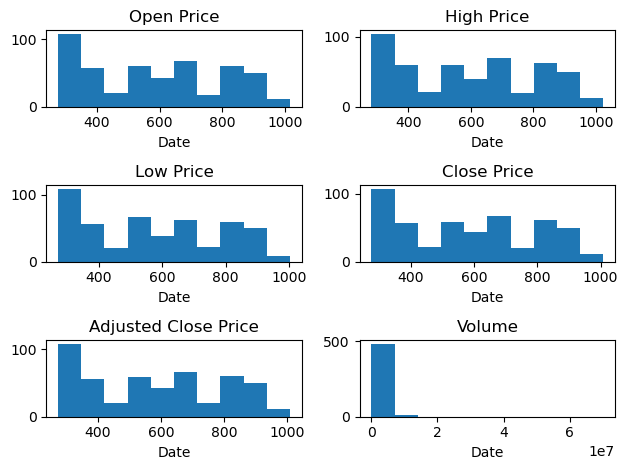

In [5]:
# Open
plt.subplot(3, 2, 1)
plt.hist(data['Open'])
plt.title('Open Price')
plt.xlabel('Date')

# High
plt.subplot(3, 2, 2)
plt.hist(data['High'])
plt.title('High Price')
plt.xlabel('Date')

# Low
plt.subplot(3, 2, 3)
plt.hist(data['Low'])
plt.title('Low Price')
plt.xlabel('Date')

# Close
plt.subplot(3, 2, 4)
plt.hist(data['Close'])
plt.title('Close Price')
plt.xlabel('Date')

# Adj Close
plt.subplot(3, 2, 5)
plt.hist(data['Adj Close'])
plt.title('Adjusted Close Price')
plt.xlabel('Date')

# Volume
plt.subplot(3, 2, 6)
plt.hist(data['Volume'])
plt.title('Volume')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

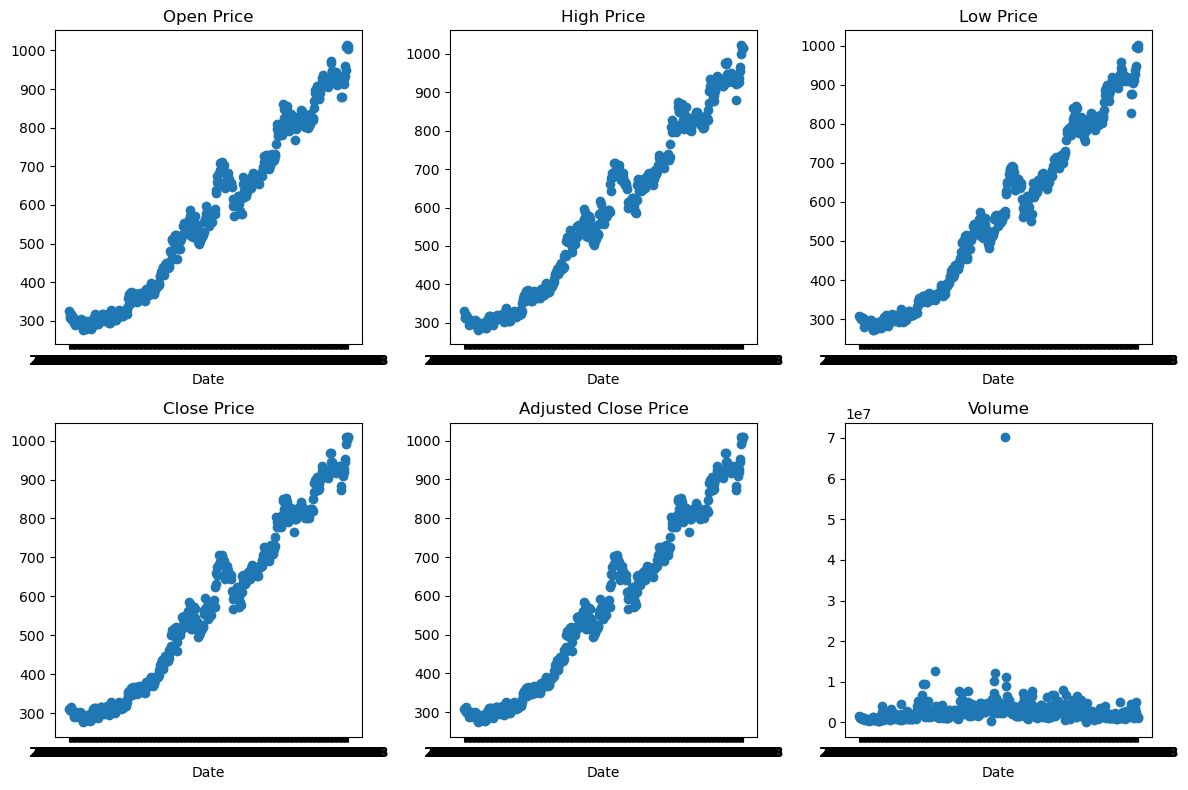

In [6]:
plt.figure(figsize=(12, 8))

# Open
plt.subplot(2, 3, 1)
plt.scatter(data['Date'], data['Open'])
plt.title('Open Price')
plt.xlabel('Date')

# High
plt.subplot(2, 3, 2)
plt.scatter(data['Date'], data['High'])
plt.title('High Price')
plt.xlabel('Date')

# Low
plt.subplot(2, 3, 3)
plt.scatter(data['Date'], data['Low'])
plt.title('Low Price')
plt.xlabel('Date')

# Close
plt.subplot(2, 3, 4)
plt.scatter(data['Date'], data['Close'])
plt.title('Close Price')
plt.xlabel('Date')

# Adj Close
plt.subplot(2, 3, 5)
plt.scatter(data['Date'], data['Adj Close'])
plt.title('Adjusted Close Price')
plt.xlabel('Date')

# Volume
plt.subplot(2, 3, 6)
plt.scatter(data['Date'], data['Volume'])
plt.title('Volume')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

In [7]:
df2=data[['Date','Close']]

In [8]:
df=data[['Date','Close']]

In [9]:
df

,Date,Close
0,2021-11-15,310.916656
1,2021-11-16,307.316681
2,2021-11-17,310.250000
3,2021-11-18,316.549988
4,2021-11-22,304.216675
...,...,...
491,2023-11-07,991.200012
492,2023-11-08,1008.849976
493,2023-11-09,1002.549988
494,2023-11-10,1009.049988


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    496 non-null    object 
 1   Close   496 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,Close
count,496.000000
mean,578.463037
std,215.744013
min,275.933319
25%,363.045845
50%,571.737518
75%,787.287521
max,1009.049988


<Axes: >

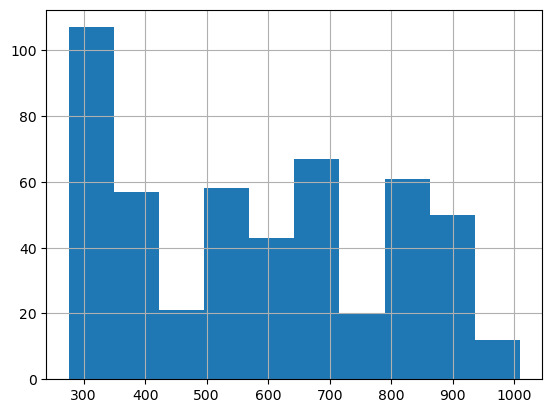

In [12]:
df['Close'].hist()

#### In most of the times the stock will closed at 500

In [13]:
df.set_index('Date',inplace=True)

In [14]:
df

,Close
Date,
2021-11-15,310.916656
2021-11-16,307.316681
2021-11-17,310.250000
2021-11-18,316.549988
2021-11-22,304.216675
...,...
2023-11-07,991.200012
2023-11-08,1008.849976
2023-11-09,1002.549988


<Axes: xlabel='Date'>

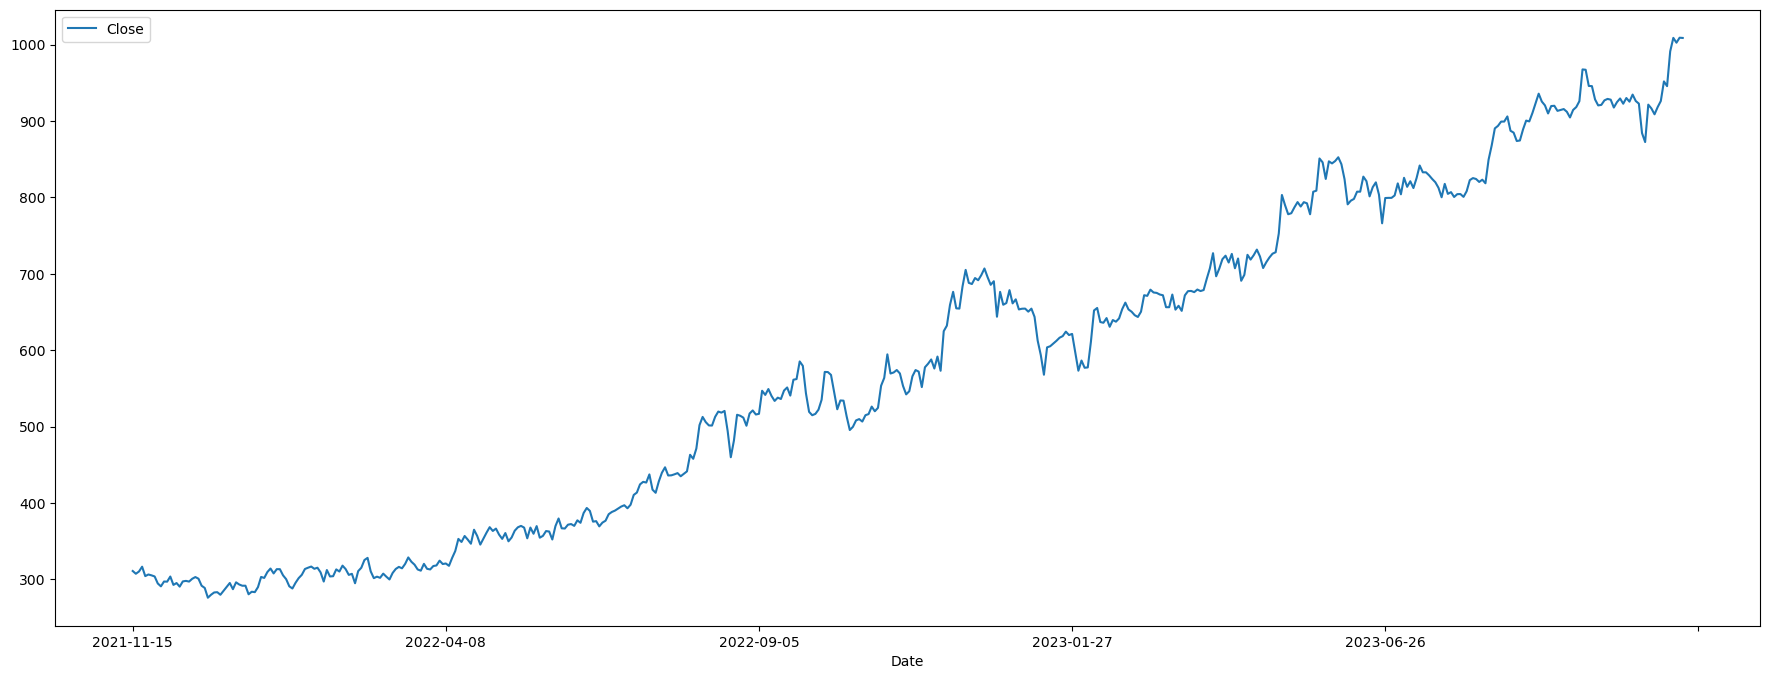

In [15]:
df.plot(figsize=(22,8))

In [16]:
result=seasonal_decompose(df['Close'],model='multiplicative',period=22)

#### Here period=22 is given because in index the date is not continuous. In a week only 5 days are trading period,in a month approximately 20-22 days are trading period

<Axes: xlabel='Date'>

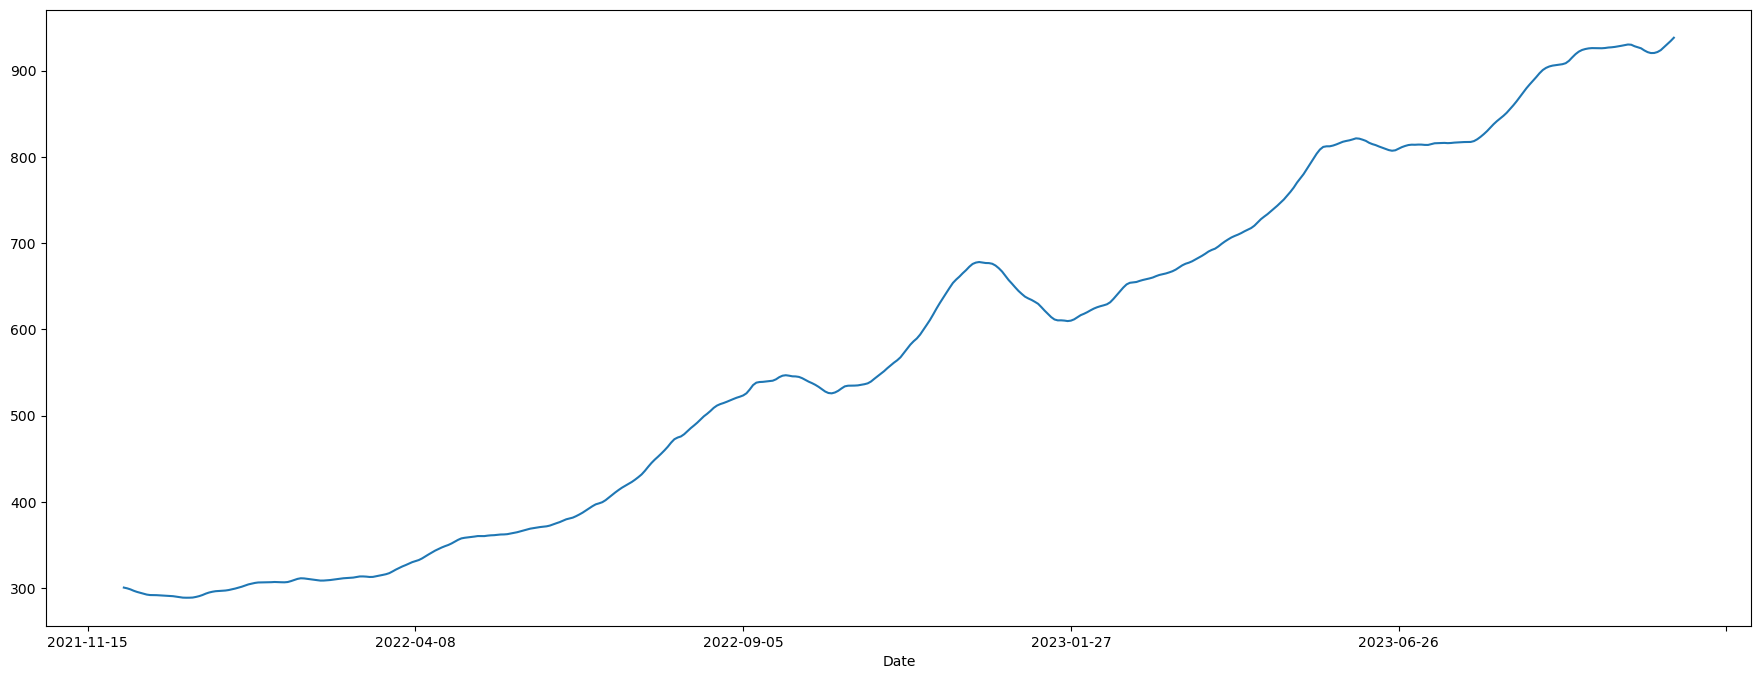

In [17]:
result.trend.plot(figsize=(22,8))

#### Here the trend is decreasing

# 

<Axes: xlabel='Date'>

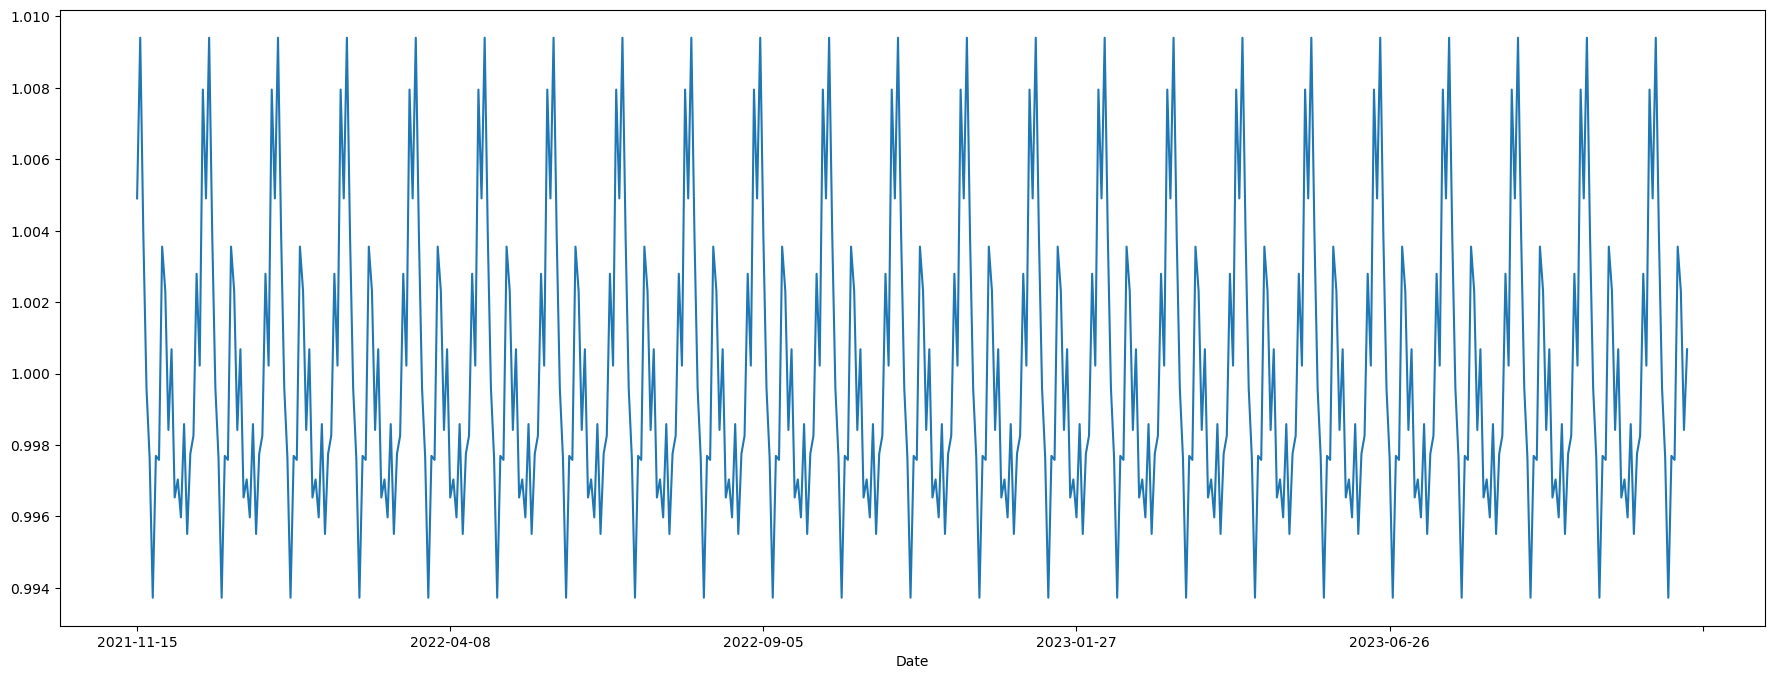

In [18]:
result.seasonal.plot(figsize=(22,8))

#### Data is Seasonal

#

<Axes: xlabel='Date'>

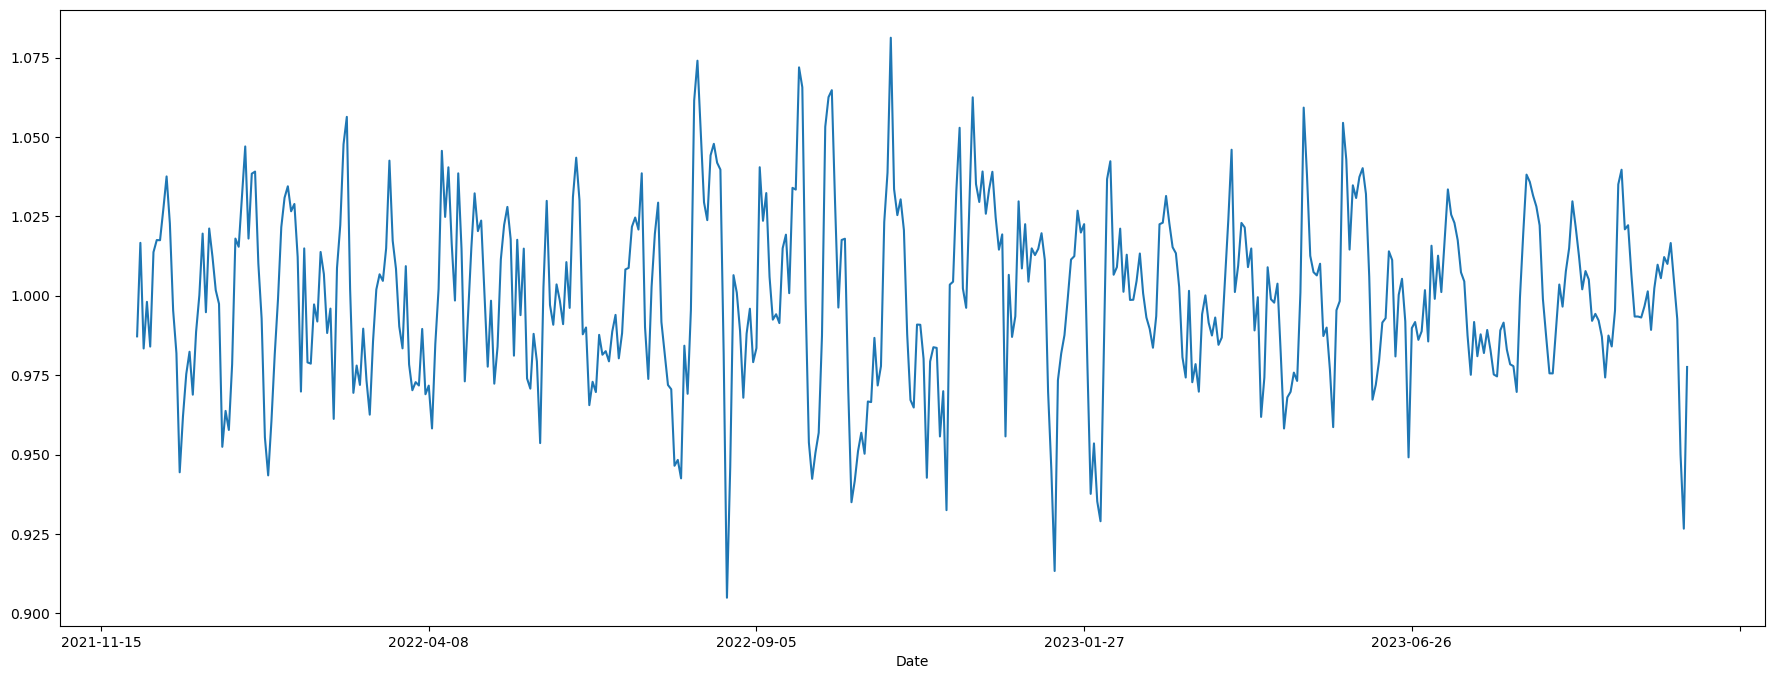

In [19]:
result.resid.plot(figsize=(22,8))

#### Data contain some noise in the year 2022

#

In [20]:
len(df)

496

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
min_max=MinMaxScaler()

In [23]:
df1=min_max.fit_transform(np.array(df))

In [24]:
df1

array([[0.04771865],
       [0.04280814],
       [0.0468093 ],
       [0.05540274],
       [0.03857961],
       [0.04148956],
       [0.03996638],
       [0.03796578],
       [0.02548482],
       [0.02030149],
       [0.02894038],
       [0.02869033],
       [0.03785209],
       [0.02289316],
       [0.02623503],
       [0.01982407],
       [0.02914498],
       [0.03005437],
       [0.02884947],
       [0.0338282 ],
       [0.03689729],
       [0.03396461],
       [0.02143816],
       [0.01745973],
       [0.        ],
       [0.00525156],
       [0.00936641],
       [0.00991206],
       [0.00527429],
       [0.01234458],
       [0.01909655],
       [0.02630326],
       [0.0152318 ],
       [0.02750816],
       [0.02364336],
       [0.02141543],
       [0.02146089],
       [0.00616095],
       [0.01068499],
       [0.00998024],
       [0.01893745],
       [0.03707916],
       [0.03535138],
       [0.04585446],
       [0.05215178],
       [0.04339921],
       [0.05099238],
       [0.050

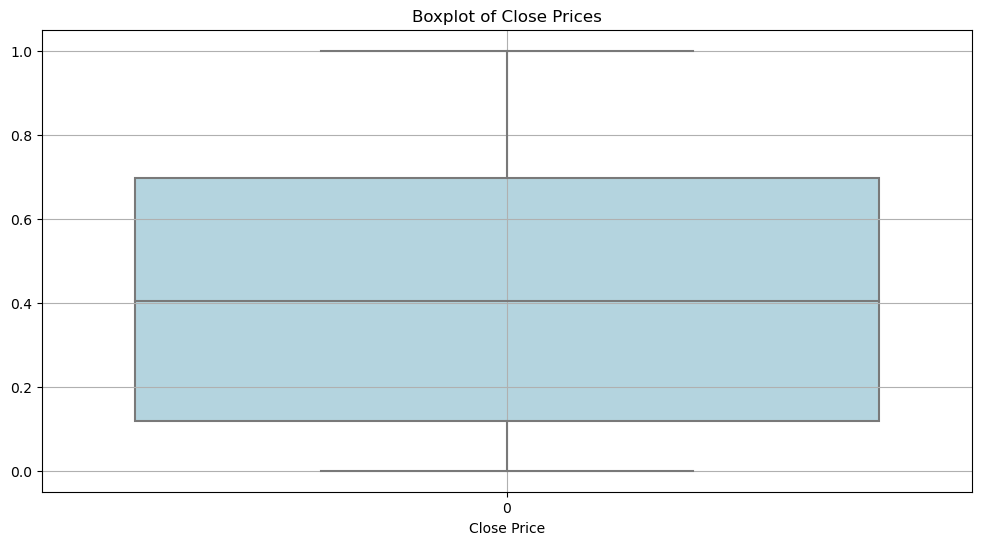

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(df1, color='lightblue')
plt.title('Boxplot of Close Prices')
plt.xlabel('Close Price')
plt.grid(True)
plt.show()

#### Here we are taking 75% data for training and remaining data for testing

In [26]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:,:]

In [27]:
print(train_data.size)
print(test_data.size)

372
124


#### It takes a dataset and creates input sequences 

In [28]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step,0])
    return np.array(dataX),np.array(dataY)

#### creating the sequence by taking the size of 100 
#### creating the training and testing datasets

In [29]:
time_step=50
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [30]:
print(x_train)

[[0.04771865 0.04280814 0.0468093  ... 0.05096961 0.04003456 0.03312345]
 [0.04280814 0.0468093  0.05540274 ... 0.04003456 0.03312345 0.02041513]
 [0.0468093  0.05540274 0.03857961 ... 0.03312345 0.02041513 0.01645943]
 ...
 [0.51071906 0.50447865 0.50134129 ... 0.65036259 0.71921253 0.70093437]
 [0.50447865 0.50134129 0.5107532  ... 0.71921253 0.70093437 0.68480459]
 [0.50134129 0.5107532  0.54018236 ... 0.70093437 0.68480459 0.68661195]]


In [31]:
print('x_train_shape',x_train.shape)
print('y_train_shape',y_train.shape)
print('x_test_shape',x_test.shape)
print('y_test_shape',y_test.shape)

x_train_shape (322, 50)
y_train_shape (322,)
x_test_shape (74, 50)
y_test_shape (74,)


#### reshape input to be [samples,time steps,features] which is required for lstm

In [32]:
x_train=x_train.reshape(322,50,1)
x_test=x_test.reshape(74,50,1)

#### By default, the LSTM layers in Keras use the hyperbolic tangent (tanh) activation function for the recurrent activation and the sigmoid activation function for the input and forget gates. These default activation functions are generally suitable for many tasks, such as sequence modeling and time series analysis. 
#### sequence_length and num_features are given as input shape.

### Model Building

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
# model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(50))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling

#### During training, the model will use the 'mean_squared_error' loss and the 'adam' optimizer to adjust its weights in order to minimize the mean squared error and make better predictions on the training data.

In [34]:
model.compile(loss='mean_squared_error',optimizer='adam')

### Fitting the model

In [35]:
lstm=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=1)

Epoch 1/100
322/322 [==============================] - 24s 42ms/step - loss: 0.0038 - val_loss: 0.0222
Epoch 2/100
322/322 [==============================] - 11s 35ms/step - loss: 0.0023 - val_loss: 0.0161
Epoch 3/100
322/322 [==============================] - 11s 35ms/step - loss: 0.0021 - val_loss: 0.0131
Epoch 4/100
322/322 [==============================] - 11s 35ms/step - loss: 0.0014 - val_loss: 0.0124
Epoch 5/100
322/322 [==============================] - 12s 37ms/step - loss: 0.0017 - val_loss: 0.0081
Epoch 6/100
322/322 [==============================] - 11s 35ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/100
322/322 [==============================] - 11s 36ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/100
322/322 [==============================] - 11s 35ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 9/100
322/322 [==============================] - 11s 35ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 10/100
322/322 [==============================] - 12s 36ms/step - l

Epoch 77/100
322/322 [==============================] - 12s 37ms/step - loss: 3.9944e-04 - val_loss: 0.0038
Epoch 78/100
322/322 [==============================] - 11s 35ms/step - loss: 4.7128e-04 - val_loss: 6.4598e-04
Epoch 79/100
322/322 [==============================] - 11s 35ms/step - loss: 5.0256e-04 - val_loss: 5.8534e-04
Epoch 80/100
322/322 [==============================] - 11s 35ms/step - loss: 4.9225e-04 - val_loss: 0.0023
Epoch 81/100
322/322 [==============================] - 12s 37ms/step - loss: 4.0853e-04 - val_loss: 0.0039
Epoch 82/100
322/322 [==============================] - 12s 37ms/step - loss: 4.2763e-04 - val_loss: 0.0040
Epoch 83/100
322/322 [==============================] - 12s 39ms/step - loss: 4.4870e-04 - val_loss: 0.0029
Epoch 84/100
322/322 [==============================] - 12s 36ms/step - loss: 3.7630e-04 - val_loss: 0.0011
Epoch 85/100
322/322 [==============================] - 11s 35ms/step - loss: 4.3072e-04 - val_loss: 0.0040
Epoch 86/100
322/322

In [36]:
# model.save('my_work.h5')

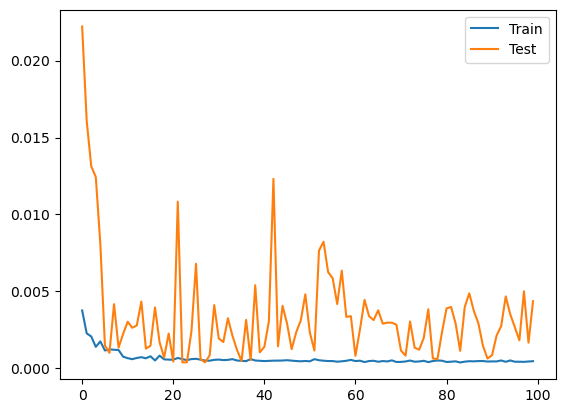

In [37]:
plt.plot(range(100),lstm.history['loss'],label='Train')
plt.plot(range(100),lstm.history['val_loss'],label='Test')
plt.legend()

#### Error  decresing with increasing the epochs

In [38]:
pred=model.predict(x_test)

3/3 [==============================] - 2s 20ms/step


####  RMSE measures the average magnitude of the errors between the predicted values and the actual values, with lower values indicating better model performance.

In [39]:
rmse=np.sqrt(mean_squared_error(y_test,pred))
rmse

0.0660557259616554

# 

#### converting the data to orginal scale

In [40]:
predd=min_max.inverse_transform(pred)
y_testt=y_test.reshape(-1,1)
y_testt=min_max.inverse_transform(y_testt)

In [41]:
y_testt=pd.DataFrame(y_testt)
predd=pd.DataFrame(predd)

In [53]:
d=data[['Date']][422:]
dd=d.reset_index()

In [54]:
dd

,index,Date
0,422,2023-07-27
1,423,2023-07-28
2,424,2023-07-31
3,425,2023-08-01
4,426,2023-08-02
...,...,...
69,491,2023-11-07
70,492,2023-11-08
71,493,2023-11-09
72,494,2023-11-10


In [55]:
predd

,0
0,791.373352
1,787.440002
2,788.565125
3,788.904907
4,786.530396
...,...
69,890.145203
70,909.591919
71,921.179626
72,922.630188


In [56]:
y_testt

,0
0,800.549988
1,804.250000
2,804.400024
3,800.700012
4,808.099976
...,...
69,991.200012
70,1008.849976
71,1002.549988
72,1009.049988


#### Setting the date column as index

In [57]:
fore=pd.concat([dd,predd,y_testt],axis=1)
fore.set_index('Date',inplace=True)

In [58]:
fore

,index,0,0
Date,,,
2023-07-27,422,791.373352,800.549988
2023-07-28,423,787.440002,804.250000
2023-07-31,424,788.565125,804.400024
2023-08-01,425,788.904907,800.700012
2023-08-02,426,786.530396,808.099976
...,...,...,...
2023-11-07,491,890.145203,991.200012
2023-11-08,492,909.591919,1008.849976
2023-11-09,493,921.179626,1002.549988


In [52]:
df.iloc[420:428]

,Close
Date,
2023-07-25,804.599976
2023-07-26,806.900024
2023-07-27,800.549988
2023-07-28,804.250000
2023-07-31,804.400024
2023-08-01,800.700012
2023-08-02,808.099976
2023-08-03,822.599976


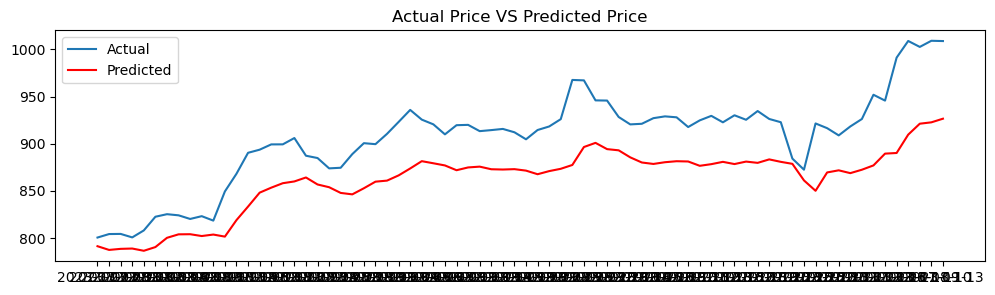

In [59]:
plt.figure(figsize=(12,3))
plt.plot(fore.iloc[:,2],label='Actual')
plt.plot(fore.iloc[:,1],label='Predicted',color='red')
plt.legend()
plt.title('Actual Price VS Predicted Price')
plt.show()

In [60]:
predicted_price = []

def stock_prediction(days):
    t = x_test[-1]
    tt = t.reshape(1, 50, 1)
    p = model.predict(tt)
    predicted_price.append(p[0])

    for i in range(days-1):    
        stockValue_list = list(t)
        stockValue_list.append(p[0])
        testing_array = np.array(stockValue_list[-50:])
        p = model.predict(testing_array.reshape(1, 50, 1))
        predicted_price.append(p[0])
    predicted_pricee=min_max.inverse_transform(predicted_price)
    return predicted_pricee

In [61]:
stock_prediction(10)

1/1 [==============================] - 0s 29ms/step


array([[926.48700338],
       [897.46037921],
       [886.32376505],
       [882.00207237],
       [880.31794018],
       [879.66069121],
       [879.4040578 ],
       [879.30377282],
       [879.26457647],
       [879.24923877]])

In [ ]:
# Assuming you already have a DataFrame 'stock_prices' with 'Date' and 'Close' columns
# If not, you can create it from your existing data

# Convert the 'Date' column to a datetime object if it's not already
df2['Date'] = pd.to_datetime(df2['Date'])

# Find the latest date in your DataFrame
latest_date = df2['Date'].max()

# Calculate the date one year from the latest date
one_year_later = latest_date + pd.DateOffset(years=1)

# Create a date range from the latest date to one year later, including only weekdays
extended_date_range = pd.date_range(start=latest_date, end=one_year_later, freq='B')

# Create a DataFrame with the extended date range
extended_stock_prices = pd.DataFrame({'Date': extended_date_range})

# Merge the extended date DataFrame with your original stock price data
extended_stock_prices = pd.merge(extended_stock_prices, df2, on='Date', how='left')

# Forward-fill missing stock prices if necessary
# extended_stock_prices['Close'].fillna(method='ffill', inplace=True)

# Print the first few rows of the extended DataFrame
print(extended_stock_prices.head())

In [ ]:
# extended_stock_prices.head(8)

In [ ]:
 date_col=extended_stock_prices[["Date"]]

In [ ]:
date_col

In [ ]:
new_columns={0:"Close"}

In [ ]:
predicted_df=pd.DataFrame(b)

In [ ]:
predicted_df=predicted_df.rename(columns=new_columns)

In [ ]:
predicted_df

In [ ]:
dfff=pd.concat([date_col,predicted_df],axis=1)

In [ ]:
dfff

In [ ]:
dfff=dfff.rename(columns=new_columns)

In [ ]:
dfff[(dfff['Date'])=="2023-10-16"]

In [ ]:
# def _stock_p(date=str(2023-10-16)):
#     resu=dfff[(dfff['Date'])=="2023-10-16"]
#     return resu
    

In [ ]:
def _stock_p(date):
    resu=dfff[(dfff['Date'])==(date)]
    return resu    

In [ ]:
sto=_stock_p("2024-10-16")

In [ ]:
sto